In [1]:
from foundry.util.registry import Registry
import foundry.core.tree as tree
import foundry.core as F
import foundry.datasets.vision
import foundry.numpy as npx

registry = Registry()
foundry.datasets.vision.register_all(registry)
dataset = registry.create("mnist")

normalizer = dataset.normalizer("hypercube")
train_data = dataset.split("train")
train_data = F.vmap(normalizer.normalize)(train_data.as_pytree())

X = train_data.pixels[:2*4*8*1024]
labels = train_data.label[:2*4*8*1024]

In [ ]:
import foundry.util.tsne
import foundry.random
import jax

tsne = foundry.util.tsne.randomized_tsne(
    X,
    rng_key=foundry.random.key(42),
    perplexity=40,
    n_iter=2048
)
print(tsne.learning_rate, tsne.betas)

2048 [0.04541977 0.02143311 0.04639648 ... 0.03083451 0.0457616  0.05736524]


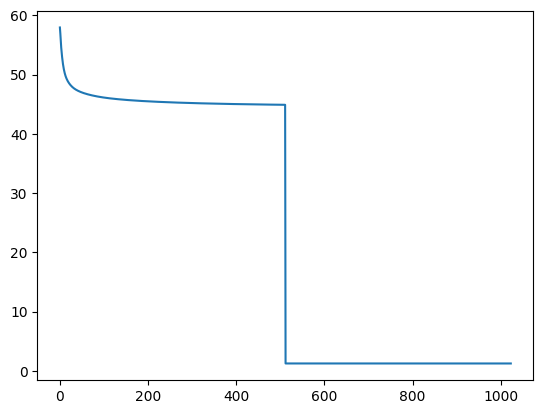

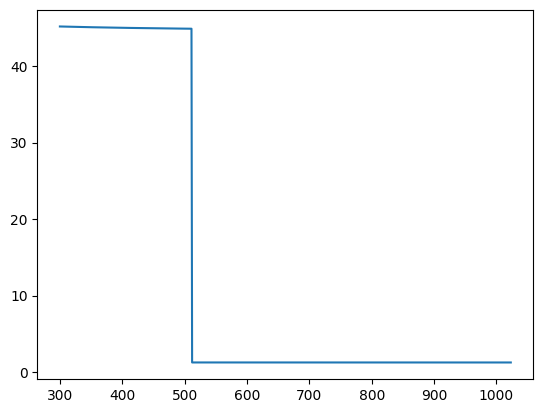

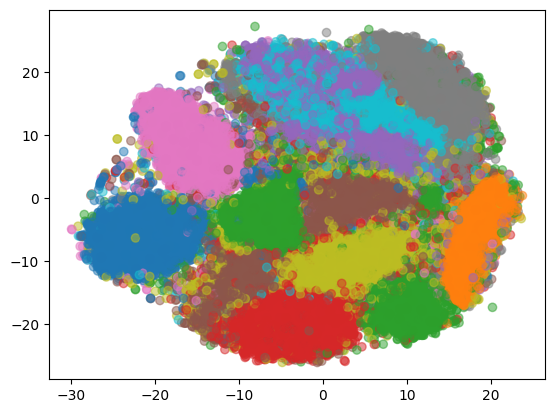

In [3]:
import matplotlib.pyplot as plt

plt.plot(npx.arange(tsne.loss_history.shape[0]), tsne.loss_history)
plt.show()
plt.plot(npx.arange(tsne.loss_history.shape[0])[300:], tsne.loss_history[300:])
plt.show()
plt.scatter(tsne.embedding[:, 0], tsne.embedding[:, 1], c=labels, cmap="tab10", alpha=0.5)
plt.show()